# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint 

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
#output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities

['torbay',
 'ushuaia',
 'fortuna',
 'rungata',
 'bethel',
 'pacific grove',
 'khovu-aksy',
 'lebu',
 'illoqqortoormiut',
 'barentsburg',
 'chokurdakh',
 'saskylakh',
 'hambantota',
 'punta arenas',
 'narsaq',
 'utiroa',
 'isla vista',
 'hilo',
 'minab',
 'port elizabeth',
 'puerto ayora',
 'busselton',
 'dauphin',
 'tsihombe',
 'rikitea',
 'tasiilaq',
 'atuona',
 'ewa beach',
 'cabo san lucas',
 'qaanaaq',
 'tuktoyaktuk',
 'linfen',
 'tiksi',
 'hermanus',
 'cockburn town',
 'carnarvon',
 'vadakku valliyur',
 'cubuk',
 'ixtapa',
 'shenjiamen',
 'port hedland',
 'alora',
 'balingasay',
 'hualmay',
 'vuktyl',
 'tezu',
 'sao geraldo do araguaia',
 'talcahuano',
 'mehamn',
 'kruisfontein',
 'carmen',
 'kapaa',
 'urusha',
 'khandyga',
 'hithadhoo',
 'arraial do cabo',
 'avarua',
 'jalu',
 'new norfolk',
 'cairns',
 'doha',
 'tumannyy',
 'bababe',
 'mataura',
 'cidreira',
 'klaksvik',
 'severodvinsk',
 'constitucion',
 'morgan city',
 'port blair',
 'bluff',
 'umm lajj',
 'bathsheba',
 'cap-a

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [28]:
url = "http://api.openweathermap.org/data/2.5/weather?"

#df = pd.DataFrame(columns={'City','Cloudiness','Country','Date','Humidity','Lat','Lng','Max Temp','Wind Speed'})
#df['City'] = cities

city = []
cloudiness = []
countries = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

citi_num = 0

for i in cities:
    url2 = url + "appid=" + api_key + "&q=" + i + '&units=imperial'
    citi_num += 1
    
    print(f"Processing city number {citi_num} | {i}")
    print(url2)
    
    weather_response = requests.get(url2).json()
    #pprint(weather_response)
        
    try:
        city.append(weather_response['name'])
    except KeyError: 
        print('City does not exist, skipping....')
        
    try:
        cloudiness.append(weather_response['clouds']['all'])
    except KeyError:
        continue
        
    try:
        countries.append(weather_response['sys']['country'])
    except KeyError:
        continue
    
    try:
        date.append(weather_response['dt'])
    except KeyError:   
        continue
 
    try:
        humidity.append(weather_response['main']['humidity'])
    except KeyError:   
        continue
        
    try:
        lat.append(weather_response['coord']['lat'])
    except KeyError:   
        continue
            
    try:
        lng.append(weather_response['coord']['lon'])
    except KeyError:   
        continue
            
    try:
        max_temp.append(weather_response['main']['temp_max'])
    except KeyError:   
        continue
            
    try:
        wind_speed.append(weather_response['wind']['speed'])
    except KeyError:   
        continue
        
#print(city)
#print(cloudiness)   
#print(countries)
#print(date)
#print(humidity)
#print(lat)
#print(lng)
#print(max_temp)
#print(wind_speed)

Processing city number 1 | torbay
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=torbay&units=imperial
Processing city number 2 | ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=ushuaia&units=imperial
Processing city number 3 | fortuna
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=fortuna&units=imperial
Processing city number 4 | rungata
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=rungata&units=imperial
City does not exist, skipping....
Processing city number 5 | bethel
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=bethel&units=imperial
Processing city number 6 | pacific grove
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=pacific grove&units=imperial
Processing city number 7 | khovu-aksy
http://api.openweathermap.org/data/2.5/weath

Processing city number 55 | hithadhoo
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=hithadhoo&units=imperial
Processing city number 56 | arraial do cabo
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=arraial do cabo&units=imperial
Processing city number 57 | avarua
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=avarua&units=imperial
Processing city number 58 | jalu
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=jalu&units=imperial
Processing city number 59 | new norfolk
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=new norfolk&units=imperial
Processing city number 60 | cairns
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=cairns&units=imperial
Processing city number 61 | doha
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56

Processing city number 109 | westport
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=westport&units=imperial
Processing city number 110 | comodoro rivadavia
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=comodoro rivadavia&units=imperial
Processing city number 111 | cape town
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=cape town&units=imperial
Processing city number 112 | vaini
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=vaini&units=imperial
Processing city number 113 | albany
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=albany&units=imperial
Processing city number 114 | sorong
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=sorong&units=imperial
Processing city number 115 | maceio
http://api.openweathermap.org/data/2.5/weather?appid=485

Processing city number 163 | nizhneyansk
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=nizhneyansk&units=imperial
City does not exist, skipping....
Processing city number 164 | guanica
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=guanica&units=imperial
Processing city number 165 | chuy
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=chuy&units=imperial
Processing city number 166 | kaitangata
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=kaitangata&units=imperial
Processing city number 167 | ierapetra
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=ierapetra&units=imperial
Processing city number 168 | cortes
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=cortes&units=imperial
Processing city number 169 | sayyan
http://api.openweathermap.org/da

Processing city number 217 | bletchley
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=bletchley&units=imperial
Processing city number 218 | muzhi
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=muzhi&units=imperial
Processing city number 219 | kirakira
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=kirakira&units=imperial
Processing city number 220 | kuching
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=kuching&units=imperial
Processing city number 221 | kalmunai
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=kalmunai&units=imperial
Processing city number 222 | grand river south east
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=grand river south east&units=imperial
City does not exist, skipping....
Processing city number 223 | burgeo
http://a

Processing city number 271 | buchanan
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=buchanan&units=imperial
Processing city number 272 | roald
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=roald&units=imperial
Processing city number 273 | grants
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=grants&units=imperial
Processing city number 274 | hasaki
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=hasaki&units=imperial
Processing city number 275 | dunedin
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=dunedin&units=imperial
Processing city number 276 | vila franca do campo
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=vila franca do campo&units=imperial
Processing city number 277 | longyearbyen
http://api.openweathermap.org/data/2.5/weather?app

Processing city number 325 | yulara
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=yulara&units=imperial
Processing city number 326 | sioux lookout
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=sioux lookout&units=imperial
Processing city number 327 | olinda
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=olinda&units=imperial
Processing city number 328 | moose factory
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=moose factory&units=imperial
Processing city number 329 | taoudenni
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=taoudenni&units=imperial
Processing city number 330 | ouallam
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=ouallam&units=imperial
Processing city number 331 | kahului
http://api.openweathermap.org/data/2.5/weather?appi

Processing city number 379 | riyadh
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=riyadh&units=imperial
Processing city number 380 | neyshabur
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=neyshabur&units=imperial
Processing city number 381 | camacha
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=camacha&units=imperial
Processing city number 382 | adrar
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=adrar&units=imperial
Processing city number 383 | touros
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=touros&units=imperial
Processing city number 384 | siuna
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=siuna&units=imperial
Processing city number 385 | cayenne
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f0

City does not exist, skipping....
Processing city number 434 | rosetta
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=rosetta&units=imperial
Processing city number 435 | togur
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=togur&units=imperial
Processing city number 436 | maghama
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=maghama&units=imperial
City does not exist, skipping....
Processing city number 437 | nova olimpia
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=nova olimpia&units=imperial
Processing city number 438 | tamasopo
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=tamasopo&units=imperial
Processing city number 439 | lieksa
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=lieksa&units=imperial
Processing city number 440 | yazykovo


Processing city number 488 | artyom
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=artyom&units=imperial
Processing city number 489 | camacari
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=camacari&units=imperial
Processing city number 490 | himora
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=himora&units=imperial
City does not exist, skipping....
Processing city number 491 | saint-augustin
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=saint-augustin&units=imperial
Processing city number 492 | houma
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=houma&units=imperial
Processing city number 493 | armasesti
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=armasesti&units=imperial
Processing city number 494 | narathiwat
http://api.openweathermap.

Processing city number 542 | zhaozhou
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=zhaozhou&units=imperial
Processing city number 543 | oga
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=oga&units=imperial
Processing city number 544 | borzya
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=borzya&units=imperial
Processing city number 545 | soweto
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=soweto&units=imperial
Processing city number 546 | eldikan
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=eldikan&units=imperial
City does not exist, skipping....
Processing city number 547 | jaguaribe
http://api.openweathermap.org/data/2.5/weather?appid=485e7cdd1e7b56fda6a063e57142f06b&q=jaguaribe&units=imperial
Processing city number 548 | bull savanna
http://api.openweathermap.org/data/2.5/wea

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [31]:
weather_dict = {
    'City':city,
    'Cloudiness':cloudiness,
    'Country':countries,
    'Date':date,
    'Humidity':humidity,
    'Lat':lat,
    'Lng':lng,
    'Max Temp':max_temp,
    'Wind Speed':wind_speed
}

weather_data = pd.DataFrame(weather_dict)
weather_data.count()

City          530
Cloudiness    530
Country       530
Date          530
Humidity      530
Lat           530
Lng           530
Max Temp      530
Wind Speed    530
dtype: int64

In [32]:
weather_data.head()
#weather_data['Lat']

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Torbay,90,CA,1547881200,79,47.66,-52.73,24.80,23.04
1,Ushuaia,75,AR,1547881200,48,-54.81,-68.31,62.60,19.46
2,Fortuna,0,ES,1547881200,76,38.18,-1.13,48.20,4.70
3,Bethel,40,US,1547883660,78,60.79,-161.76,8.60,12.75
4,Pacific Grove,20,US,1547882100,76,36.62,-121.92,51.98,3.85


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

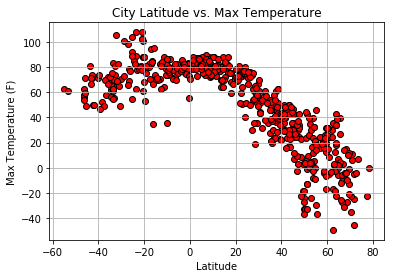

In [40]:
plt.scatter(weather_data['Lat'], weather_data['Max Temp'], marker='o',color='r',edgecolors='black')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title("City Latitude vs. Max Temperature")
plt.savefig('Max_Temp.png')

#### Latitude vs. Humidity Plot

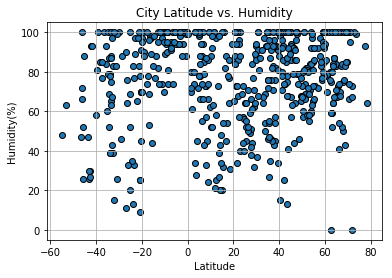

In [42]:
plt.scatter(weather_data['Lat'], weather_data['Humidity'], marker='o',edgecolors='black')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title("City Latitude vs. Humidity")
plt.savefig('Humidity.png')

#### Latitude vs. Cloudiness Plot

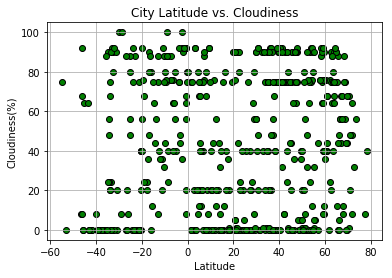

In [43]:
plt.scatter(weather_data['Lat'], weather_data['Cloudiness'], marker='o',color='g',edgecolors='black')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title("City Latitude vs. Cloudiness")
plt.savefig('Cloudiness.png')

#### Latitude vs. Wind Speed Plot

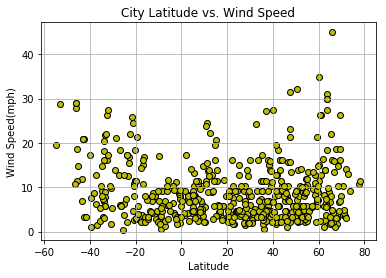

In [44]:
plt.scatter(weather_data['Lat'], weather_data['Wind Speed'], marker='o',color='y',edgecolors='black')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.title("City Latitude vs. Wind Speed")
plt.savefig('Wind_Speed.png')